In [307]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Added some imports in the whatif.py file here , since the python script was not deciphering them, renamed whatif to hw22_visweswaran

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import copy

In [309]:
from hw22_visweswaran import Model

In [310]:
from hw22_visweswaran import get_sim_results_df

1A :Basic observation : Since the demand is being met , that means the order quantity is same as the demand

In [311]:
class SingleProductSPF(Model):
    """ Product SPF Model
        ----------------------
        
        *This model is based off the bookstore model in the whatif package
        * We place orders which are equal to the demand since the demand is always fulfilled
        * The demand is a quadratic function based off the selling price for each month per unit
        * The rest of the parameters are almost same as the bookstore model
        
        Attributes:
        ----------------------
        fixed_constant: fixed rate for creating the whole order irrespective of the number of units per month
                        float or array-like of float(default = 5000)
        var_cost : variable rate of ordering per month 
                    float or array-like of float(default = 100)
        selling_price: variable selling price for each unit per month
                     float or array-like of float(default = 115)
        spf_constant: 4900
        spf_linear: -35
        spf_quadratic 0.06 : All are fixed coefficients for the demand as a function of selling price
        """
    
    def __init__(self,fixed_cost = 5000,var_cost=100,selling_price=115,
                 spf_constant = 4900, spf_linear = -35,spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    """demand is based off a formula"""    
    def demand(self):
        return self.spf_quadratic*pow(self.selling_price,2)+self.spf_linear*self.selling_price+self.spf_constant
    """  order cost is based off demand and hence can be used here"""  
    def order_cost(self):
        return self.demand()*self.var_cost+self.fixed_cost
    """  sales revenue again is based off demand , since it is always met and hence can be used again"""  
    def sales_revenue(self):
        return self.demand()*self.selling_price
    """profit is just the  normal formula herr (No minimum , maximum concepts required)"""  
    def profit(self):
        return self.sales_revenue() - self.order_cost()

In [312]:
base_model = SingleProductSPF()

Initial check passed

In [313]:
base_model.profit()

20027.5

1B: Creating the selling price ranges

Keeping the selling price with a step size of 10

In [314]:
dt_param_ranges = {'selling_price':np.arange(80,141,10)}

Taking the outputs for the demand and profit

In [315]:
outputs = ['demand','profit']

The base model once created , can be used to link all the methods , imported from the hw22_visweswaran.py file ,since it adds the methods since our base model inherits all those methods.

In [316]:
hw_model_df = base_model.data_table(dt_param_ranges,outputs)

In [317]:
hw_model_df

,selling_price,demand,profit
0,80,2484.0,-54680.0
1,90,2236.0,-27360.0
2,100,2000.0,-5000.0
3,110,1776.0,12760.0
4,120,1564.0,26280.0
5,130,1364.0,35920.0
6,140,1176.0,42040.0


As the demand varies quadratically with selling price and profit is linearly related to demand , hence profit is also quadratically related to selling price and hence it shows the same curved format with the selling price

[Text(0.5, 1.0, 'Selling price vs Profit'),
 Text(0.5, 0, 'Selling Price'),
 Text(0, 0.5, 'Profit')]

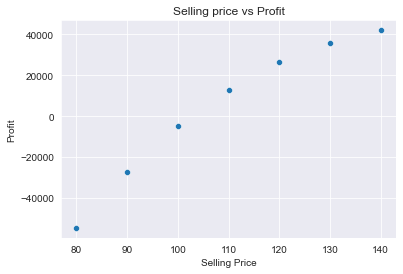

In [318]:
sns.set_style("darkgrid")
sns.scatterplot(x="selling_price", y="profit",data=hw_model_df, palette="viridis").set(title="Selling price vs Profit",xlabel="Selling Price",ylabel="Profit")

1C: Goal_Seek , Break_Even Analysis

The break even selling price is 102.57.It id the point at which the profit goes to 0 and also can be seen from the curve above.

In [319]:
base_model.goal_seek( 'profit', 0, 'selling_price',80, 140, N=100)

102.57578606424767

1D : 2 Way Data Table

For the 2 way data table again , the 2 inputs are varied and they are combined in a form of list of dictionaries from the parametergrid built in method

In [320]:
dt_param_ranges_2_way = {'selling_price':np.arange(80,141,10),'var_cost':np.arange(85,111,5)}

In [321]:
outputs_2way = ['order_cost','profit']

In [322]:
hw_model_df_2 = base_model.data_table(dt_param_ranges_2_way,outputs_2way)

In [323]:
hw_model_df_2.head()

,selling_price,var_cost,order_cost,profit
0,80,85,216140.0,-17420.0
1,80,90,228560.0,-29840.0
2,80,95,240980.0,-42260.0
3,80,100,253400.0,-54680.0
4,80,105,265820.0,-67100.0


The plots make sense , since as the variable cost of production changes the order cost would increase which would directly affect the profit which reduces with the increasing variable cost of production

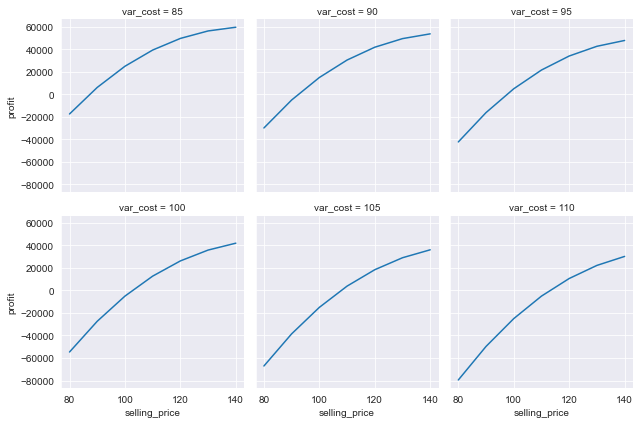

In [324]:
profit_dt_g = sns.FacetGrid(hw_model_df_2, col="var_cost", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "selling_price", "profit")

1E - Change the range of the selling price now

In [325]:
dt_param_ranges_e = {'selling_price':np.arange(80,251,10)}

In [326]:
outputs_e = ['demand','profit']

In [327]:
hw_model_df_e = base_model.data_table(dt_param_ranges_e,outputs_e)

From the graph it is evident that the profit goes to 0 twice in this range

[Text(0.5, 1.0, 'Selling price vs Profit'),
 Text(0.5, 0, 'Selling Price'),
 Text(0, 0.5, 'Profit')]

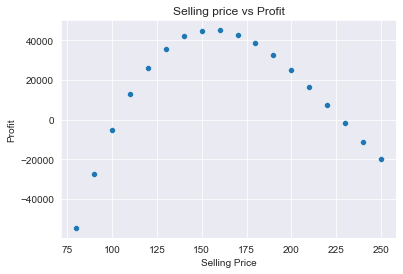

In [328]:
sns.set_style("darkgrid")
sns.scatterplot(x="selling_price", y="profit",data=hw_model_df_e, palette="viridis").set(title="Selling price vs Profit",xlabel="Selling Price",ylabel="Profit")

The goal seek fails here , because if we take the left limit its target is within its local scope and the target for the right limit also falls within its local scope and since they both fall within the local scope, their sign does not vary ,i.e. the right limit stays in its own local scope with the same sign as the left limit when it is subtracted from its local scope and hence they do not converge to the same 0 , but differnt zeroes in their corresponding local scopes , giving a greater than 0 result always and hence return nothing

In [329]:
base_model.goal_seek( 'profit', 0, 'selling_price',80, 250, N=100)

1F

Keeping the seed the same from the whatif documentation

In [330]:
from numpy.random import default_rng
rg = default_rng(4470)
rg.random() 

0.45855804438027437

From the monte carlo simulation methods , it takes a uniformly distributed variable cost

In [331]:
random_inputs = {'var_cost': rg.uniform(80,120, 100)}

In [332]:
sim_outputs = ['profit']

In [333]:
model_results = base_model.simulate(random_inputs, sim_outputs)

In [334]:
final_df = get_sim_results_df(model_results)

In [335]:
final_df['profit']

0     43371.982227
1     39257.449247
2     30530.501317
3     -8959.808939
4      5887.083797
          ...     
95    51279.331055
96    30365.628918
97    -4502.041094
98    40199.937827
99     9950.802779
Name: profit, Length: 100, dtype: float64

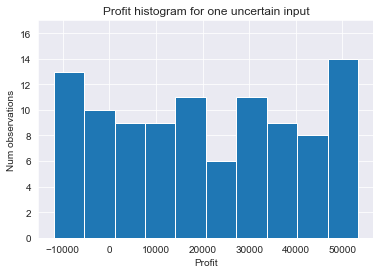

In [336]:
plt.title("Profit histogram for one uncertain input")
plt.xlabel("Profit")
plt.ylabel("Num observations")
plt.ylim(0, 17)
plt.hist(final_df['profit'], density=False);

In [337]:
from scipy import stats

There is a 22% chance that the profit is negative

In [338]:
print(stats.percentileofscore(final_df['profit'], 0) / 100.0)

0.22


1F with scenarios


In [339]:
scenario_inputs = {'selling_price': np.arange(80, 141, 10)}

In [340]:
model_results_scenarios = base_model.simulate(random_inputs,sim_outputs,scenario_inputs)

In [341]:
final_df_scenario = get_sim_results_df(model_results_scenarios)

In [342]:
final_df_scenario

,profit,scenario_num,selling_price
0,-19925.613514,0,80
1,-26051.175350,0,80
2,-39043.526957,0,80
3,-97835.214506,0,80
4,-75731.719418,0,80
...,...,...,...
95,64067.062224,6,140
96,49326.568539,6,140
97,24750.973733,6,140
98,56258.032295,6,140


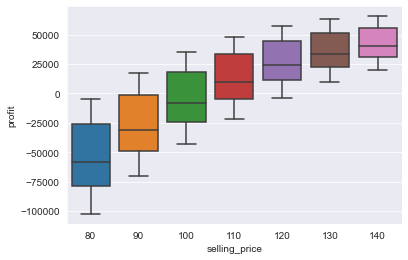

In [343]:
sns.boxplot(x="selling_price", y="profit", data=final_df_scenario);

Here each scenario of a different selling price is taken and for each scenario a set of stats is generated for each set of variable cost and we can see that as the selling price increases the profit goes more towards the right which is bound to happen

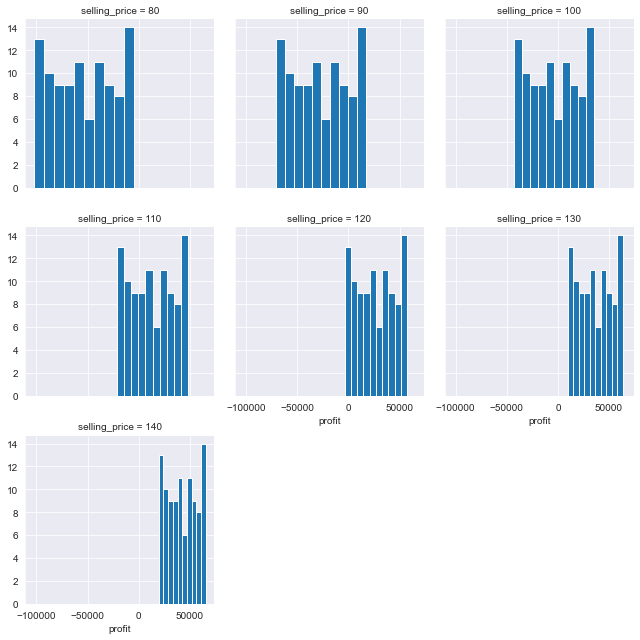

In [344]:
profit_histo_g2 = sns.FacetGrid(final_df_scenario, col='selling_price', sharey=True, col_wrap=3)
profit_histo_g2 = profit_histo_g2.map(plt.hist, "profit")